In [1]:
from matplotlib import pyplot as plt
import numpy as np
#
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Flatten, Dense, Dropout
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.optimizers import SGD

from sklearn.manifold import TSNE
from sklearn import manifold, cluster
from sklearn.preprocessing import StandardScaler

C:\Users\hongbo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.python.keras.applications import vgg16
model = vgg16.VGG16()
sgd=SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
import cv2

(224, 224, 3)


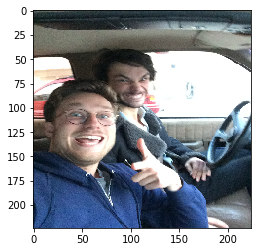

In [4]:
# last dimension is BGR
# while for matplotlib, last dimension is RGB
im_original=cv2.resize(cv2.imread('dumb.jpg'), (224, 224))  
print(im_original.shape)
im = im_original[:, :, ::-1]  #RGB
plt.imshow(im)

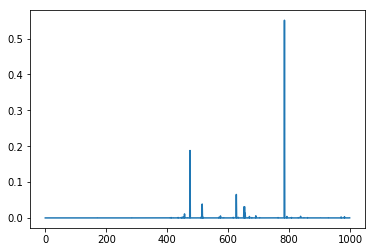

In [5]:
im=np.expand_dims(im, axis=0)
out = model.predict(im)
plt.plot(out.reshape(-1))

(1, 56, 56, 256)


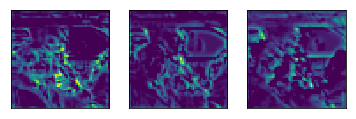

In [6]:
from tensorflow.python.keras import backend as K

# extracting arbitrary feature maps
layer_index = 8
get_features=K.function([model.layers[0].input], [model.layers[layer_index].output])
#
feat = get_features([im])[0]
print(feat.shape)
len_pics=3
for i in range(len_pics):
    plt.subplot(1, len_pics, i+1)
    plt.imshow(feat[0, :, :, i])
    plt.xticks([])
    plt.yticks([])

In [7]:
#
from skimage.transform import resize
import skimage
print(skimage.__version__)

import scipy as sp

# extract hypercolumns
def extract_hypercolumn(model, layer_indices, img):
    layers = [model.layers[i].output for i in layer_indices]
    get_features=K.function([model.layers[0].input], layers)
    feature_maps = get_features([img])  # [nouts, nsamples, height, width, nchs]
    #
    hypercolumns=[]
    for conv_map in feature_maps:
        for fmap in conv_map[0]:
            #upscaled = resize(fmap, (224, 224), preserve_range=True)
            upscaled = sp.misc.imresize(fmap, size=(224, 224), mode="F", interp='bilinear')
            hypercolumns.append(upscaled)
            
    return np.asarray(hypercolumns)

0.13.1


C:\Users\hongbo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


(168, 224, 224)
(224, 224, 168)
(224, 224)


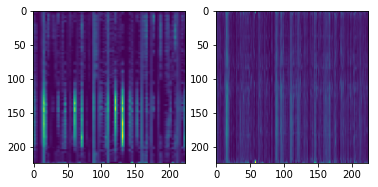

In [8]:
layers_extract=[3, 8]
hc = extract_hypercolumn(model, layers_extract, im)
# 
print(hc.shape)
#
hc_trans = hc.transpose(1, 2, 0)
print(hc_trans.shape)
plt.subplot(1, 2, 1)
plt.imshow(hc_trans[:, :, 5])
#
ave = np.average(hc_trans, axis=2)
print(ave.shape)
plt.subplot(1, 2, 2)
plt.imshow(ave)